In [52]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/emotions")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Mahdi\.cache\kagglehub\datasets\nelgiriyewithana\emotions\versions\1


In [53]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrmorj/hate-speech-and-offensive-language-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Mahdi\.cache\kagglehub\datasets\mrmorj\hate-speech-and-offensive-language-dataset\versions\1


Loading data

In [128]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [55]:
emotions_df  = pd.read_csv(r'C:\Practices\Projects\NLP Projects\Multi task learning\datasets\emotion\emotion_data.csv')
hate_speech_df = pd.read_csv(r'C:\Practices\Projects\NLP Projects\Multi task learning\datasets\hate speech\hate_speech_data.csv')

In [56]:
emotions_df.head(5)

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [57]:
hate_speech_df.head(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


Data Preprocessing

In [58]:
# Dropping unwanted columns
emotions_df.drop(columns= 'Unnamed: 0', inplace= True)

In [59]:
hate_df = hate_speech_df[['tweet', 'class']]

In [60]:
hate_df.head(5)

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [61]:
emotions_df.head(5)

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [62]:
# renaming the columns
hate_df.rename(columns= {'tweet' : 'text', 'class' : 'label'}, inplace= True)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_14404\957079665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hate_df.rename(columns= {'tweet' : 'text', 'class' : 'label'}, inplace= True)


In [63]:
hate_df.columns, emotions_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'))

In [64]:
# Checking for null values
print(hate_df.isna().sum(),emotions_df.isna().sum())

text     0
label    0
dtype: int64 text     0
label    0
dtype: int64


In [65]:
emotions_df.shape, hate_df.shape

((416809, 2), (24783, 2))

Extracting 12k rows from each df

In [66]:
emotions_df['label'].value_counts()

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

In [67]:
# this loop will extract 12k rows 
# 2k each labels

e_df = pd.DataFrame()

for i in range(6):
    subset = emotions_df[emotions_df['label'] == i].sample(n= 2000, random_state= 42)
    e_df = pd.concat([e_df, subset])

In [68]:
e_df.shape

(12000, 2)

In [69]:
emotions_df = e_df.copy()

In [70]:
emotions_df['label'].value_counts()

label
0    2000
1    2000
2    2000
3    2000
4    2000
5    2000
Name: count, dtype: int64

In [71]:
hate_df['label'].value_counts()

label
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [72]:
offensive_speech = hate_df[hate_df['label'] == 1].sample(n= 6407, random_state= 42)
hate_df = hate_df[hate_df['label'] != 1]

In [73]:
hate_df.shape

(5593, 2)

In [74]:
hate_df = pd.concat([offensive_speech, hate_df], axis= 0)

In [75]:
hate_df.shape

(12000, 2)

In [76]:
hate_df.head(10)

,text,label
22889,Why is it everytime I go to cracker barrel the...,1
20565,"Run that nigga, you don't want that nigga, but...",1
10780,I need a girl from Jamaica I can't fuck with t...,1
17261,RT @ShadowBeatz_Inc: I know you have me blocke...,1
13954,Put ya hands up if you a Grade A bitch,1
20770,"She used to fuck wit A$AP, Too Shortsaid he kn...",1
10381,I got some lightskin pussy one time and the bi...,1
2067,' If you get yo girl took don't be mad at the ...,1
9972,I actually just hate the bitches on here,1
2471,@Aram2432 I have class nig,1


In [77]:
# resetting the indexes
emotions_df.reset_index(drop = True, inplace= True)
hate_df.reset_index(drop= True, inplace= True)

In [78]:
emotions_df.head(5)


,text,label
0,ive learned to surround myself with women who ...,0
1,i already feel crappy because of this and you ...,0
2,i feel like i have lost mourned and moved past...,0
3,i could write a whole lot more about why im fe...,0
4,i always seem to feel inadequate,0


In [79]:
emotions_df.head(5)

,text,label
0,ive learned to surround myself with women who ...,0
1,i already feel crappy because of this and you ...,0
2,i feel like i have lost mourned and moved past...,0
3,i could write a whole lot more about why im fe...,0
4,i always seem to feel inadequate,0


In [80]:
# Shuffle
emotions_df = emotions_df.sample(frac= 1, random_state= 42).reset_index(drop= True)
hate_df = hate_df.sample(frac= 1, random_state= 42).reset_index(drop= True)

In [81]:
emotions_df.head(10)

,text,label
0,im posting from bed listening rain pouring dow...,0
1,i have every right to feel angered by it,3
2,i feel slightly ungrateful mostly due to being...,0
3,i just realized it when i got back home and th...,4
4,im away from blogging for two whole days and i...,0
5,i feel reluctant to sit outside alone in publi...,4
6,i get my work done i am treated with such resp...,2
7,i acknowledge and for some reason i feel a lit...,4
8,i do kind of agree with them i also feel lifet...,1
9,i feel romantic data url http on skin,2


In [82]:
hate_df.head(10)

,text,label
0,@monetkittrell all this spaceship shit is reta...,1
1,"""OVO"" &#8220;@Allthingsfresh3: &amp; kendrick ...",2
2,"Oh ""@SoNi99a_: i hope Dre falls dickhole first...",1
3,"I went to see This is Where I Leave You, at a ...",2
4,"""@sniffsockslad: Need these sox http://t.co/xy...",1
5,People get more and more retarded everyday,0
6,@msteffens32 @StonerBoii2cold back in high sch...,1
7,Charlie is so adorable. http://t.co/TMpBYyjGFL,2
8,@caylanashlee cause everyone just loves yo bit...,1
9,Idk why bitches think they players lol bitches...,1


No need to do label encoding because we already have label in numerical form

Stopwords removal

In [83]:
nltk.download(['stopwords', 'punkt'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mahdi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mahdi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [84]:
# loading the stopwords
stop_words = set(stopwords.words('english'))

In [85]:
len(stopwords.words('english'))

198

In [86]:
print(len(stop_words))

198


In [87]:
# Stopword removal function
def remove_stopwords(text):
    all_words = nltk.word_tokenize(text)
    filtered_words = [word for word in all_words if word.lower() not in stop_words]
    return " ".join(filtered_words)

In [88]:
hate_df['text'] = hate_df['text'].apply(remove_stopwords)
emotions_df['text'] = emotions_df['text'].apply(remove_stopwords)

In [89]:
hate_df.head(5)

,text,label
0,@ monetkittrell spaceship shit retarded .,1
1,`` OVO '' & # 8220 ; @ Allthingsfresh3 : & amp...,2
2,Oh `` @ SoNi99a_ : hope Dre falls dickhole fir...,1
3,"went see Leave , movie theater tables real foo...",2
4,`` @ sniffsockslad : Need sox http : //t.co/xy...,1


In [90]:
emotions_df.head(4)

,text,label
0,im posting bed listening rain pouring im feeli...,0
1,every right feel angered,3
2,feel slightly ungrateful mostly due homesick,0
3,realized got back home feeling shy laughed lou...,4


Tokenization and Padding

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([emotions_df['text'], hate_df['text']]))

In [ ]:
# Converts into numerics

emotion_sequences = tokenizer.texts_to_sequences(emotions_df['text'])
hate_sequences = tokenizer.texts_to_sequences(hate_df['text'])

In [97]:
emotion_sequences[0]

[6, 977, 373, 1034, 1345, 4510, 6, 2, 1007]

In [98]:
emotions_df['text'].iloc[3]

'realized got back home feeling shy laughed loud cause find stupid stupid omg omg im clown someone laugh'

In [99]:
# Padding
max_length = 50
emotion_padded = pad_sequences(emotion_sequences, maxlen= max_length, padding= 'post')
hate_padded = pad_sequences(hate_sequences, maxlen= max_length, padding= 'post')

In [103]:
print(emotion_padded[:3])
print(emotion_sequences[:3])

[[   6  977  373 1034 1345 4510    6    2 1007    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [  78   59    1 1988    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   1  457 1035 1107  902 1060    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]]
[[6, 977, 373, 1034, 1345, 4510, 6, 2, 1007], [78, 59, 1, 1988], [1, 457, 1035, 1107, 902, 1060]]


In [105]:
# generating labels in numpy array format
emotions_labels = np.array(emotions_df['label'])
hate_labels = np.array(hate_df['label'])

Model Definition

In [107]:
# prepare separate input for each dataframe
emotion_input = emotion_padded
hate_input = hate_padded

In [109]:
# defining multiple input layers for each task
emotion_input_layer = keras.layers.Input(shape= (max_length,), name= 'emotion_input')
hate_input_layer = keras.layers.Input(shape= (max_length,), name= 'hate_input')

In [ ]:
# Use a shared embedding layer
embedding_layer = keras.layers.Embedding(input_dim= len(tokenizer.word_index) + 1, output_dim= 128)

In [111]:
# APPLY THE EMBEDDING LAYER TO EACH INPUT
emotion_embedding = embedding_layer(emotion_input_layer)
hate_embedding = embedding_layer(hate_input_layer)

In [112]:
# A shared LSTM layer
shared_LSTM = keras.layers.LSTM(64, return_sequences= True)

In [113]:
emotion_LSTM = shared_LSTM(emotion_embedding)
hate_LSTM = shared_LSTM(hate_embedding)

In [114]:
# shared global average pooling layer and dropout layer
shared_pooling = keras.layers.GlobalAveragePooling1D()
shared_dropout = keras.layers.Dropout(0.5)

In [115]:
emotion_features = shared_dropout(shared_pooling(emotion_LSTM))
hate_features = shared_dropout(shared_pooling(hate_LSTM))

In [116]:
# Output layers
emotion_output = keras.layers.Dense(6, activation= 'softmax', name= 'emotion_output')(emotion_features)
hate_output = keras.layers.Dense(3, activation= 'softmax', name= 'hate_output')(hate_features)

In [118]:
# Model compilation with multiple input and output
model = keras.models.Model(inputs = [emotion_input_layer, hate_input_layer], 
                           outputs= [emotion_output, hate_output])

model.compile(optimizer= 'adam', 
              loss={
                  'emotion_output' : 'sparse_categorical_crossentropy',
                  'hate_output' : 'sparse_categorical_crossentropy'
              },
              metrics = {
                  'emotion_output' : 'accuracy',
                  'hate_output' : 'accuracy'
              })

In [119]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ emotion_input       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_input          │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 128)   │  4,037,760 │ emotion_input[0]… │
│ (Embedding)         │                   │            │ hate_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 50, 64)    │     49,408 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ lstm[0][0],       │
│ (GlobalAveragePool… │                   │            │ lstm[1][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ global_average_p… │
│                     │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emotion_output      │ (None, 6)         │        390 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_output (Dense) │ (None, 3)         │        195 │ dropout[1][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,087,753 (15.59 MB)

 Trainable params: 4,087,753 (15.59 MB)

 Non-trainable params: 0 (0.00 B)

In [120]:
# training the model with separate input
# x -> input
# y -> output
model.fit(x = {'emotion_input': emotion_input,
               'hate_input' : hate_input},
        y = {'emotion_output' : emotions_labels,
             'hate_output' : hate_labels},
             epochs= 10, batch_size= 4)

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 202s 65ms/step - emotion_output_accuracy: 0.3483 - emotion_output_loss: 1.5013 - hate_output_accuracy: 0.7771 - hate_output_loss: 0.6135 - loss: 2.1148
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 254s 85ms/step - emotion_output_accuracy: 0.8942 - emotion_output_loss: 0.3541 - hate_output_accuracy: 0.8851 - hate_output_loss: 0.3314 - loss: 0.6855
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 226s 72ms/step - emotion_output_accuracy: 0.9492 - emotion_output_loss: 0.1629 - hate_output_accuracy: 0.9361 - hate_output_loss: 0.1740 - loss: 0.3368
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 214s 56ms/step - emotion_output_accuracy: 0.9679 - emotion_output_loss: 0.0991 - hate_output_accuracy: 0.9708 - hate_output_loss: 0.0867 - loss: 0.1858
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 193s 64ms/step - emotion_output_accuracy: 0.9762 - emotion_output_loss: 0.0730 - hate_output_accuracy: 0.9851 - hate_output_loss: 0.0474 - loss: 0.1204
Epoch 6/10
3000/3000 ━━━━━━━━━

Prediction and evaluation

In [124]:
prediction= model.predict({'emotion_input': emotion_input,
                         'hate_input': hate_input})

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step


In [125]:
prediction

[array([[9.9996948e-01, 1.1235635e-06, 9.0461344e-07, 2.5896214e-05,
         6.0502680e-07, 1.9840504e-06],
        [1.7336479e-05, 2.6447002e-05, 3.3411377e-06, 9.9991739e-01,
         3.4657998e-05, 8.9995598e-07],
        [9.9999917e-01, 7.9210054e-08, 9.5057082e-09, 6.6427657e-07,
         5.6682335e-08, 8.7336545e-08],
        ...,
        [2.2190488e-05, 4.6633337e-05, 9.9990857e-01, 1.7801247e-05,
         4.1677354e-06, 6.9042221e-07],
        [9.9999726e-01, 4.3745504e-07, 2.1707589e-08, 9.2405969e-07,
         6.0807241e-07, 7.7332686e-07],
        [3.1830873e-03, 3.4442596e-06, 8.8658345e-07, 9.9678135e-01,
         3.0954649e-05, 2.7590085e-07]], shape=(12000, 6), dtype=float32),
 array([[8.5207796e-07, 9.9999905e-01, 9.2288346e-08],
        [1.2566844e-07, 4.6829127e-06, 9.9999523e-01],
        [2.4314379e-06, 9.9999702e-01, 6.0712193e-07],
        ...,
        [2.4015694e-06, 9.9999726e-01, 2.8396900e-07],
        [5.7863840e-06, 9.9997830e-01, 1.5856544e-05],
        [1

In [126]:
emotion_pred = np.argmax(prediction[0], axis= 1) 
hate_pred = np.argmax(prediction[1], axis= 1) 

In [129]:
emotions_df['label'].unique()

array([0, 3, 4, 2, 1, 5])

In [132]:
def plot_cm(true, pred, title, labels):
    cf = confusion_matrix(true, pred, normalize= 'true')
    plt.figure(figsize = (7, 6)) 
    sns.heatmap(cf, annot= True, cmap = 'Blues', xticklabels= labels, yticklabels= labels)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')\
    
emotions_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
hate_labels_text = ['offensive speech', 'Neither', 'Hate Speech']

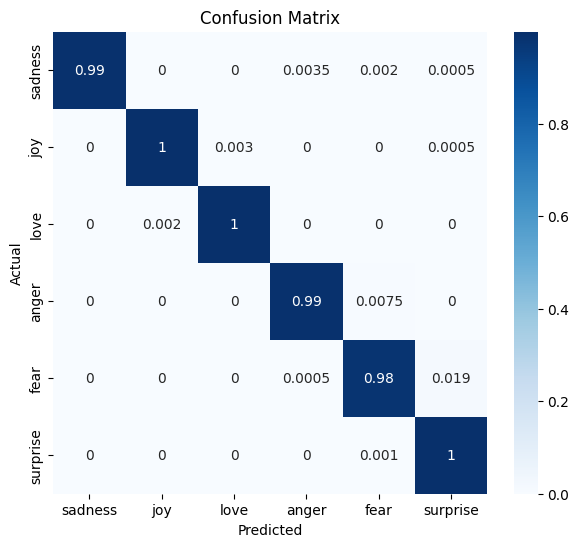

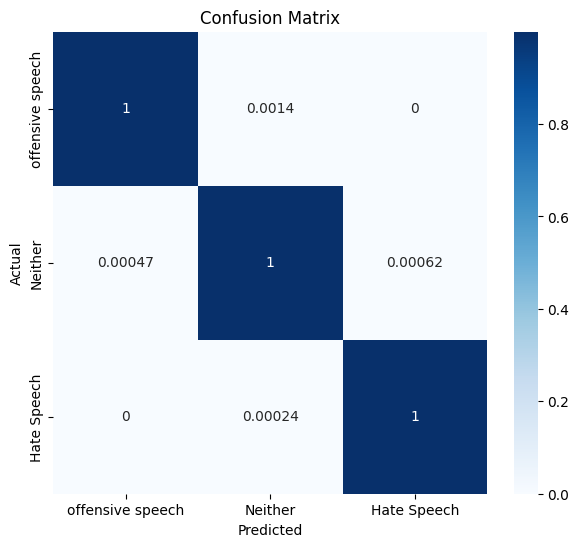

In [133]:
plot_cm(emotions_labels, emotion_pred, 'Confusion Matrix', emotions_labels_text )
plot_cm(hate_labels, hate_pred, 'Confusion Matrix', hate_labels_text )

Manual testing

In [160]:
def classify_text(input_text):
    # preprocess the input text
    input_text_cleaned = remove_stopwords(input_text)
    input_sequence = tokenizer.texts_to_sequences([input_text_cleaned])
    input_padded = pad_sequences(input_sequence, maxlen= max_length, padding= 'post')

    prediction  = model.predict({
        'emotion_input' : input_padded,
        'hate_input' : input_padded
    })
    
    emotion_pred = np.argmax(prediction[0], axis= 1)[0]
    hate_pred = np.argmax(prediction[1], axis= 1)[0]

    # Determine major label
    major_labels = ['Emotion', 'Hate']
    major_labels_index = np.argmax([np.max(prediction[0]), np.max(prediction[1])])
    major_label = major_labels[major_labels_index]

    # Determining sub - labels
    emotions_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
    hate_labels_text = ['offensive speech', 'Neither', 'Hate Speech']

    if major_label == 'Emotion':
        sub_label = emotions_labels_text[emotion_pred]
    else:
        sub_label = hate_labels_text[hate_pred]

    return major_label, sub_label

In [161]:
import ipywidgets as widgets
from IPython.display import display

In [162]:
# defining a text widget and a placeholder
input_text_widget = widgets.Text(
    description = 'Input text: ',
    placeholder = 'Enter your text'
)

In [163]:
# Define classify button 
button = widgets.Button(description= 'classify')

In [164]:
# define an output area to display result
output = widgets.Output()

In [165]:
# Function to handle event
def on_button_click(b):
    with output:
        output.clear_output()
        input_text = input_text_widget.value
        major_label, sub_label = classify_text(input_text)
        print(f'Major Label: {major_label}')
        print(f'Sub label: {sub_label}')

# attach the button at the bottom
button.on_click(on_button_click)

In [166]:
display(input_text_widgets, button, output)

Text(value='I am afraid', description='Input text: ', placeholder='Enter your text')

Button(description='classify', style=ButtonStyle())

Output()